# 10 Years of T-Bill and Bond Yield Data (2014-2024): A Comprehensive Report

In [ ]:
!pip install --upgrade seaborn pandas

In [ ]:
!pip install --upgrade openpyxl


In [ ]:
import openpyxl
print(openpyxl.__version__)  # This should output 3.1.5 or newer


# Data Loading & Cleaning (From Excel & PowerBI) (Expand to View)

In [173]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import warnings  # To manage warnings in the code
from statsmodels.tsa.seasonal import seasonal_decompose  # For seasonal decomposition of time series
from statsmodels.tsa.stattools import adfuller, acf, pacf  # For statistical tests and autocorrelation functions
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # For Exponential Smoothing methods
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Suppress FutureWarnings to keep output clean
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the Excel data into a DataFrame
file_path = 'C:/Users/2D/Desktop/CV_correct/Analyzing 10 Years of Bond Data_1.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)  # Read the Excel file into a DataFrame

# Display the first few rows of the DataFrame for an initial inspection
print(df.head())  # Print the first 5 rows to understand the structure of the data

# Clean the DataFrame
# Ensure that the 'Date' column is in datetime format for proper handling of date-related operations
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format

# Set the 'Date' column as the index of the DataFrame for easier plotting and time series analysis
df.set_index('Date', inplace=True)  # Set 'Date' as the index

# Check for missing values in the DataFrame and handle them
df.ffill(inplace=True)  # Forward fill missing values to propagate the last valid observation forward
df.dropna(inplace=True)  # Drop any remaining rows with missing values



        Date  1 years T-bill yields  2 years bond yields  5 years bond yields  \
0 2014-01-02                   0.99                 1.13                 1.93   
1 2014-01-03                   0.99                 1.14                 1.94   
2 2014-01-06                   0.99                 1.13                 1.91   
3 2014-01-07                   0.99                 1.11                 1.87   
4 2014-01-08                   0.98                 1.11                 1.90   

   10 years bond yields  2Y-1Y Spreads  5Y-2Y Spreads  10Y-5Y Spreads  
0                  2.74           0.14           0.80            0.81  
1                  2.75           0.15           0.80            0.81  
2                  2.72           0.14           0.78            0.81  
3                  2.67           0.12           0.76            0.80  
4                  2.72           0.13           0.79            0.82  


# Fundamental Analysis (From Excel & PowerBI) (Expand to View)

In [175]:
# Descriptive Statistics
# Calculate and display descriptive statistics for the DataFrame
# This includes measures such as count, mean, standard deviation, min, max, and percentiles for each numeric column
print("Descriptive Statistics:\n", df.describe())  # Print the summary statistics of the DataFrame


Descriptive Statistics:
        1 years T-bill yields  2 years bond yields  5 years bond yields  \
count            2495.000000          2495.000000          2495.000000   
mean                1.502088             1.495034             1.606232   
std                 1.400035             1.247531             0.968729   
min                 0.100000             0.150000             0.300000   
25%                 0.530000             0.540000             0.830000   
50%                 0.990000             1.070000             1.470000   
75%                 1.740000             1.880000             2.050000   
max                 5.300000             4.970000             4.420000   

       10 years bond yields  2Y-1Y Spreads  5Y-2Y Spreads  10Y-5Y Spreads  
count           2495.000000    2495.000000    2495.000000     2495.000000  
mean               1.888020      -0.007054       0.111198        0.281788  
std                0.789699       0.225419       0.361455        0.302183  
min 

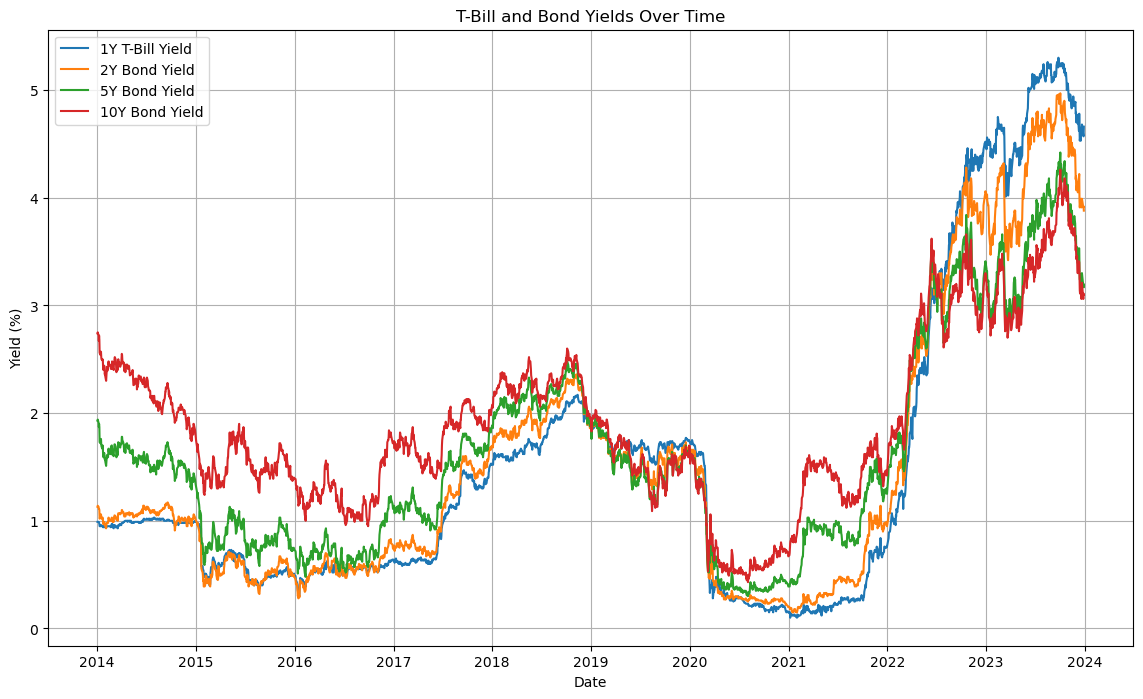

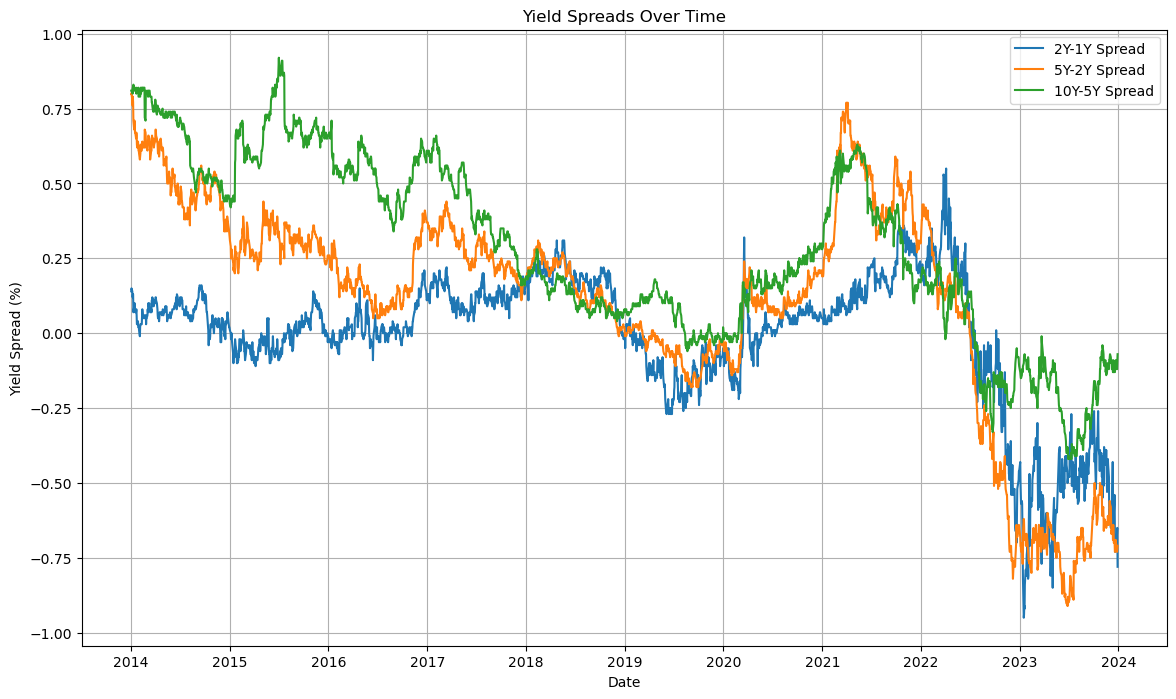

In [154]:
# Time Series Analysis Visualization
# Create a figure for visualizing bond yields over time
plt.figure(figsize=(14, 8))  # Set the figure size for the plot

# Plot the yields for different bond types using line plots
sns.lineplot(data=df, x=df.index, y='1 years T-bill yields', label='1Y T-Bill Yield')  # Plot 1Y T-Bill yields
sns.lineplot(data=df, x=df.index, y='2 years bond yields', label='2Y Bond Yield')  # Plot 2Y Bond yields
sns.lineplot(data=df, x=df.index, y='5 years bond yields', label='5Y Bond Yield')  # Plot 5Y Bond yields
sns.lineplot(data=df, x=df.index, y='10 years bond yields', label='10Y Bond Yield')  # Plot 10Y Bond yields

# Set plot title and labels
plt.title('T-Bill and Bond Yields Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Yield (%)')  # Y-axis label
plt.legend()  # Display legend for different lines
plt.grid()  # Add grid for better readability
plt.show()  # Display the plot









# Yield Spread Calculations
# Calculate yield spreads between different bond yields
df['2Y-1Y'] = df['2 years bond yields'] - df['1 years T-bill yields']  # 2Y-1Y spread
df['5Y-2Y'] = df['5 years bond yields'] - df['2 years bond yields']  # 5Y-2Y spread
df['10Y-5Y'] = df['10 years bond yields'] - df['5 years bond yields']  # 10Y-5Y spread

# Yield Spread Analysis Visualization
# Create a figure for visualizing yield spreads over time
plt.figure(figsize=(14, 8))  # Set the figure size for the plot

# Plot the yield spreads using line plots
sns.lineplot(data=df, x=df.index, y='2Y-1Y', label='2Y-1Y Spread')  # Plot the 2Y-1Y spread
sns.lineplot(data=df, x=df.index, y='5Y-2Y', label='5Y-2Y Spread')  # Plot the 5Y-2Y spread
sns.lineplot(data=df, x=df.index, y='10Y-5Y', label='10Y-5Y Spread')  # Plot the 10Y-5Y spread

# Set plot title and labels
plt.title('Yield Spreads Over Time')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Yield Spread (%)')  # Y-axis label
plt.legend()  # Display legend for different lines
plt.grid()  # Add grid for better readability
plt.show()  # Display the plot


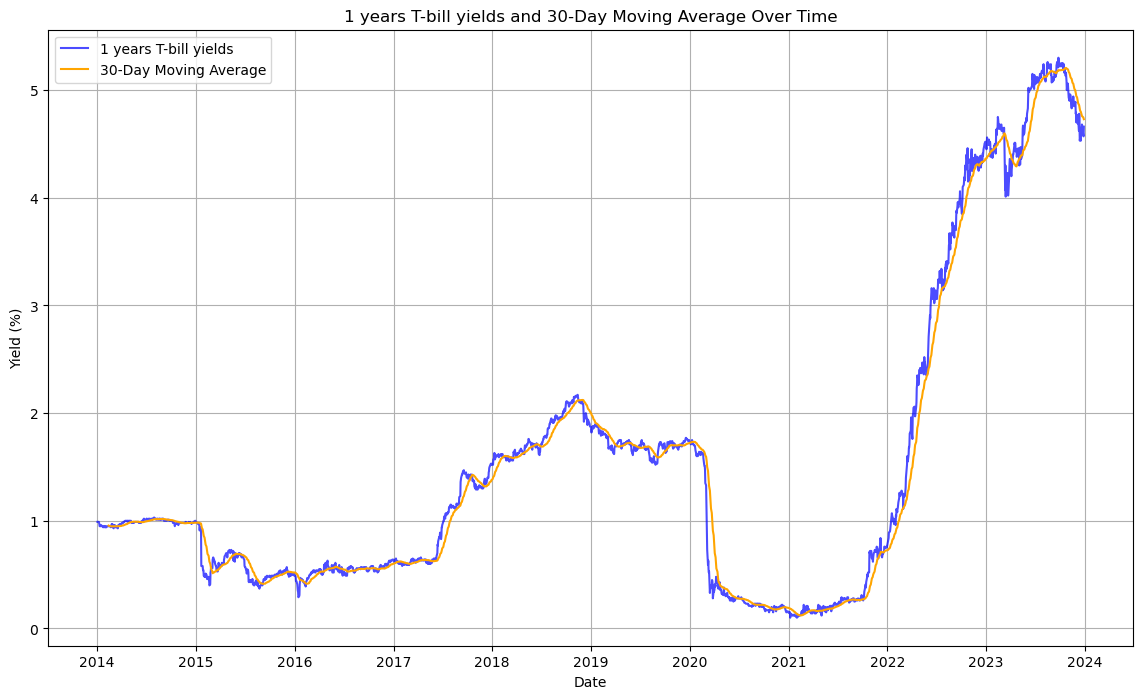

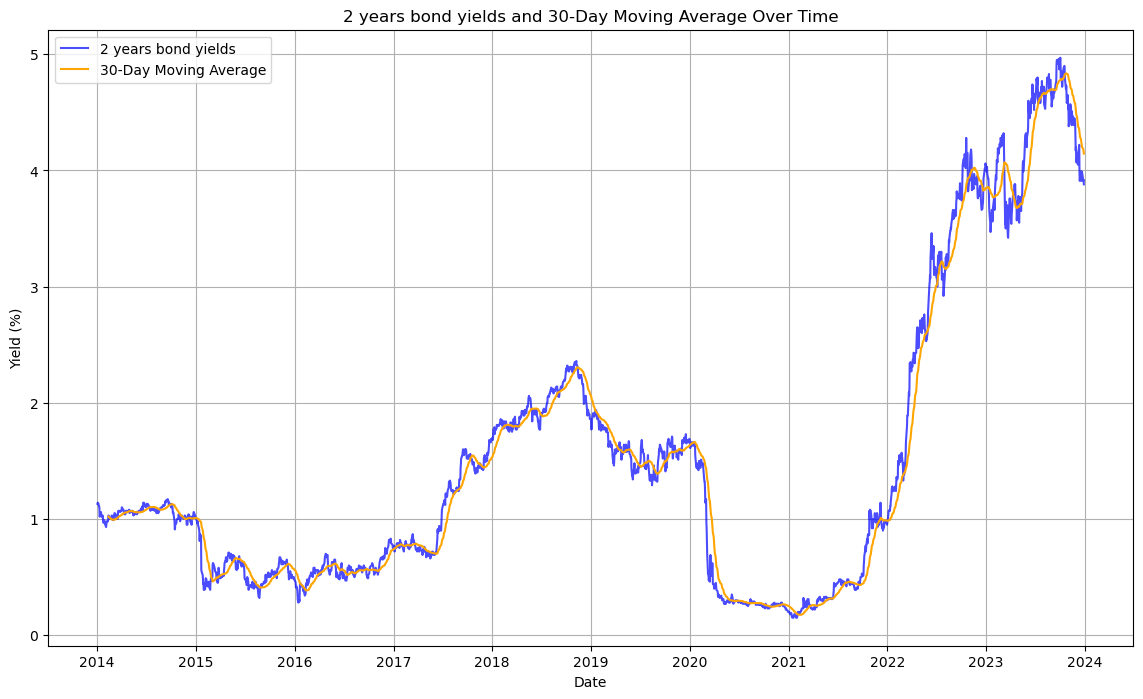

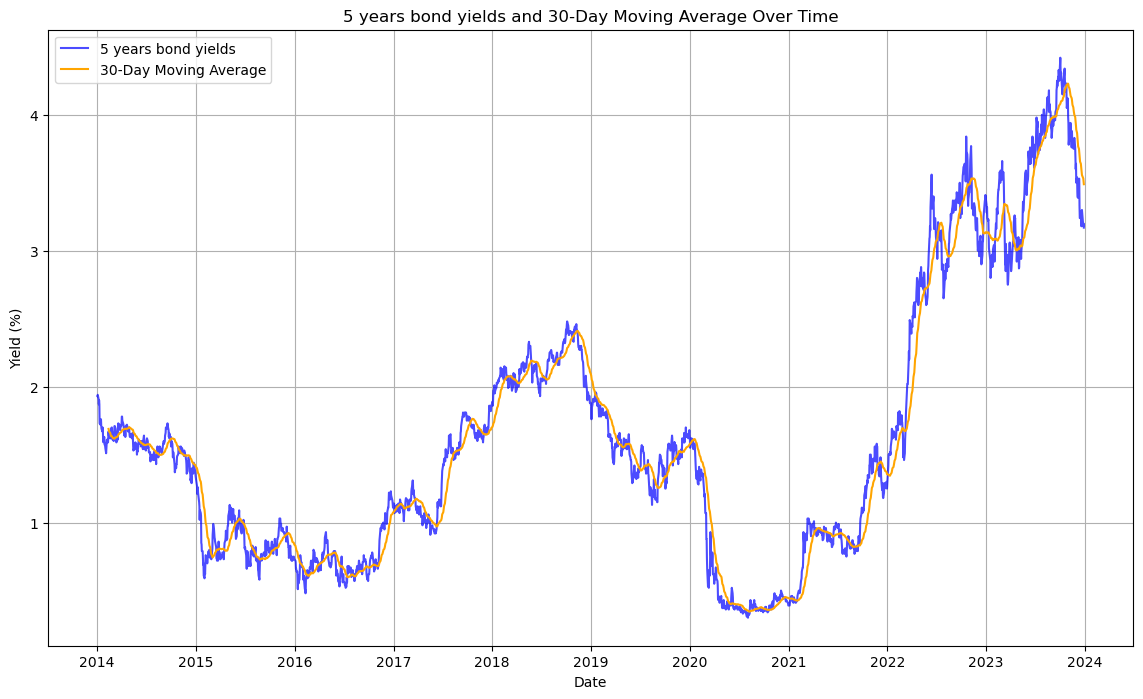

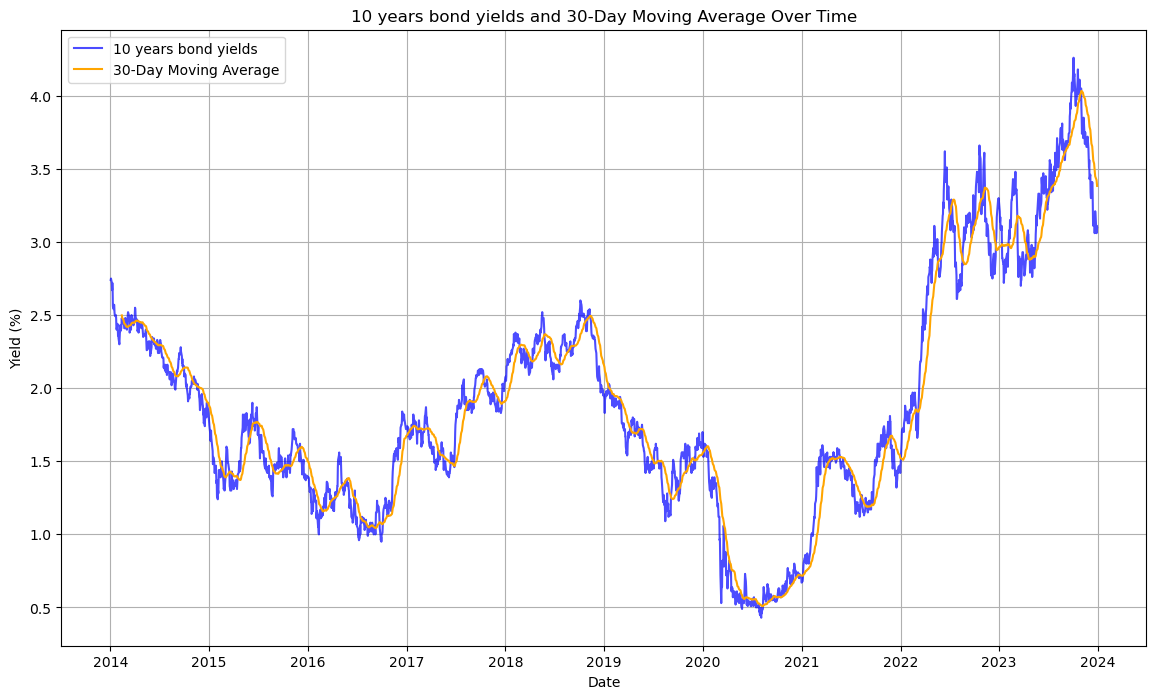

In [156]:
# 30 days Moving Average
# Function to plot the moving averages of a specified yield column
def plot_moving_averages(df, column, window):
    plt.figure(figsize=(14, 8))  # Set the figure size for the plot
    sns.lineplot(data=df[column], label=column, color='blue', alpha=0.7)  # Plot the actual yield data
    sns.lineplot(data=df[column].rolling(window=window).mean(), label=f'{window}-Day Moving Average', color='orange')  # Plot the moving average
    plt.title(f'{column} and {window}-Day Moving Average Over Time')  # Set the title of the plot
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Yield (%)')  # Label for the y-axis
    plt.legend()  # Show legend to differentiate between the actual data and moving average
    plt.grid()  # Add grid lines for better readability
    plt.show()  # Display the plot

# Plot moving averages for each yield
moving_average_window = 30  # Set the window size for the moving average; can be adjusted as needed
# Iterate through each yield column to plot its moving average
for yield_column in ['1 years T-bill yields', '2 years bond yields', '5 years bond yields', '10 years bond yields']:
    plot_moving_averages(df, yield_column, moving_average_window)  # Call the function to plot moving averages


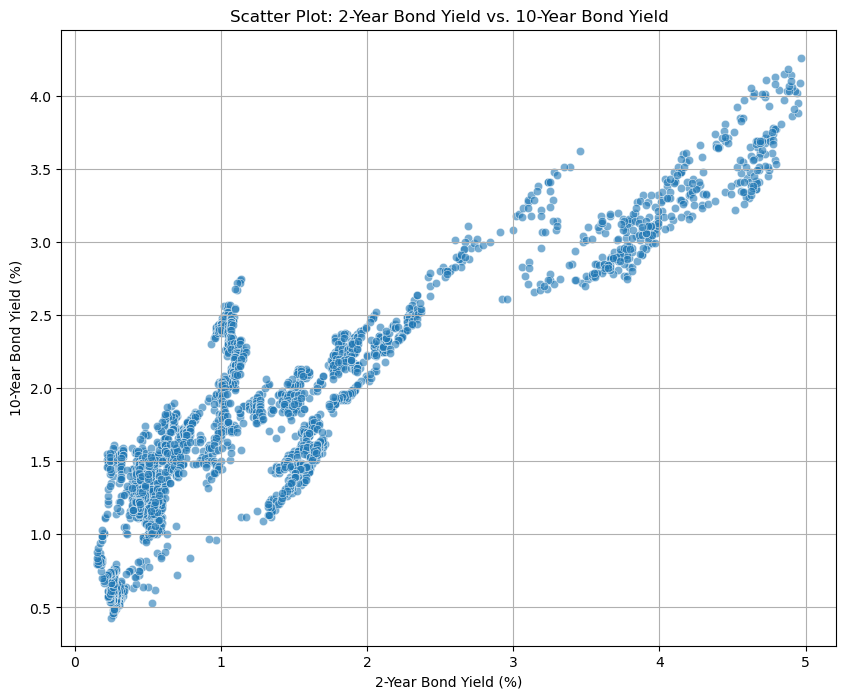

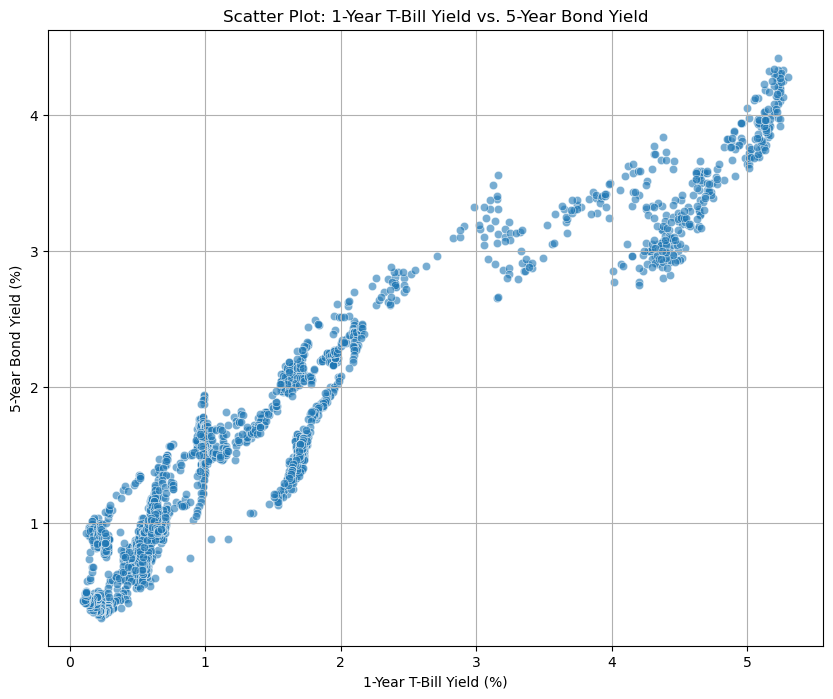

In [158]:
# Scatter Plot of 2-Year vs. 10-Year Bond Yields
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='2 years bond yields', y='10 years bond yields', alpha=0.6)
plt.title('Scatter Plot: 2-Year Bond Yield vs. 10-Year Bond Yield')
plt.xlabel('2-Year Bond Yield (%)')
plt.ylabel('10-Year Bond Yield (%)')
plt.grid()
plt.show()

# Scatter Plot of 1-Year T-Bill Yield vs. 5-Year Bond Yield
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='1 years T-bill yields', y='5 years bond yields', alpha=0.6)
plt.title('Scatter Plot: 1-Year T-Bill Yield vs. 5-Year Bond Yield')
plt.xlabel('1-Year T-Bill Yield (%)')
plt.ylabel('5-Year Bond Yield (%)')
plt.grid()
plt.show()

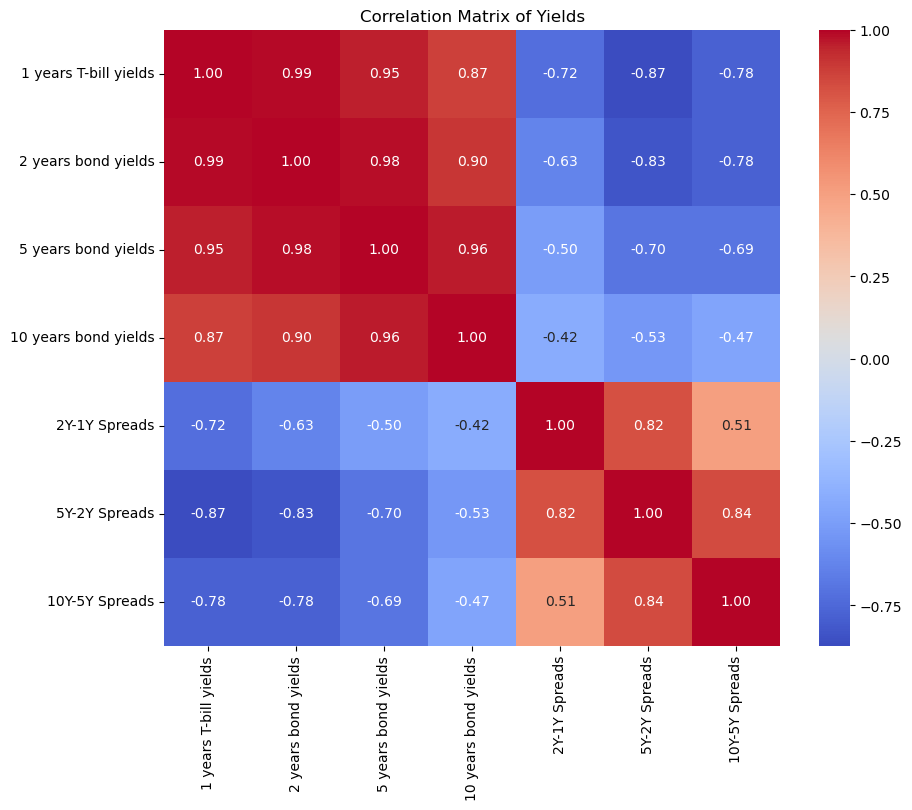

In [171]:
# Correlation Matrix & Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Yields')
plt.show()

# Advanced Analysis (From Excel & PowerBI) (Expand to View)

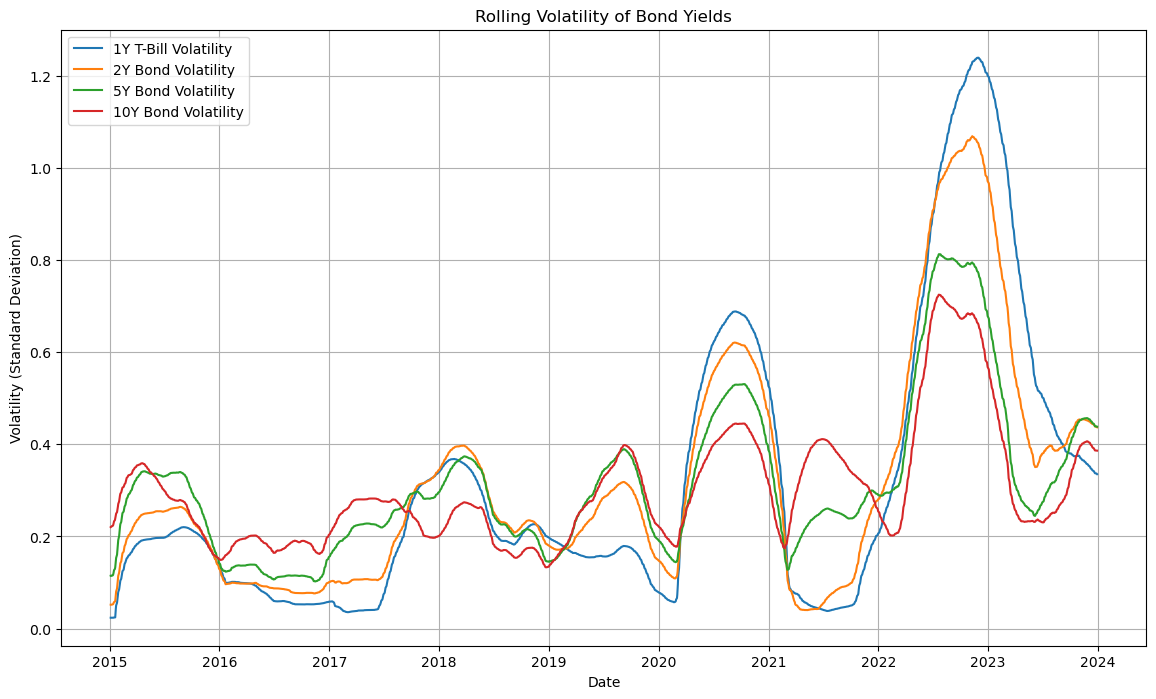

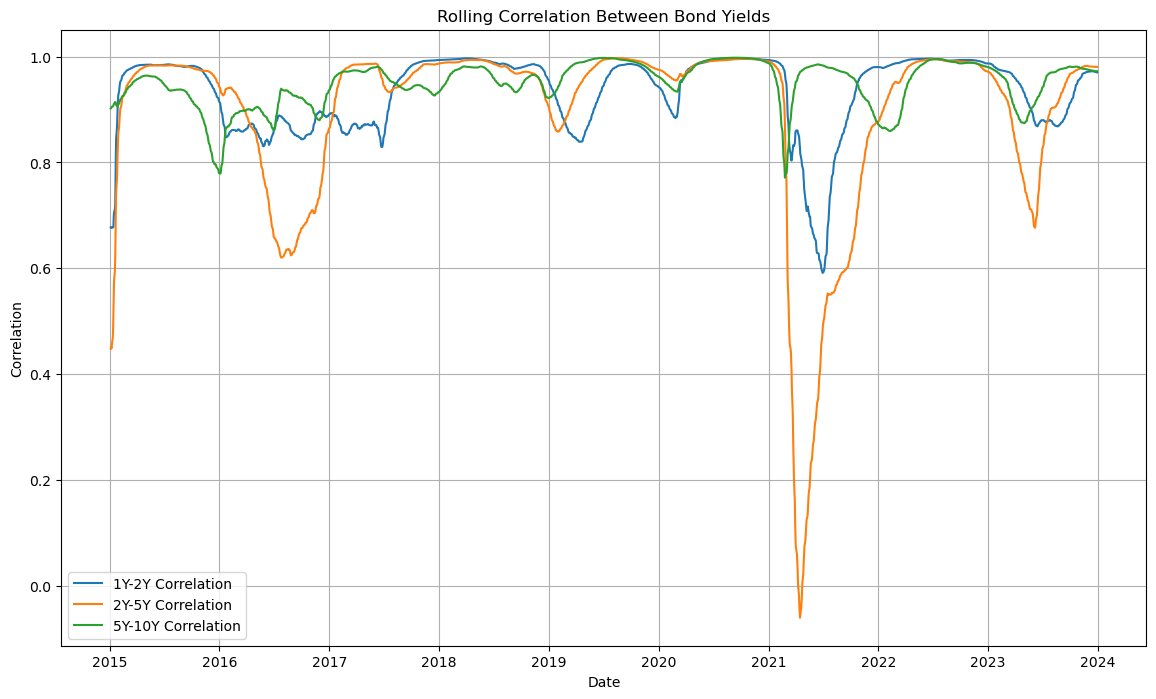

Explained Variance Ratios (PCA): [0.95718515 0.03880241]


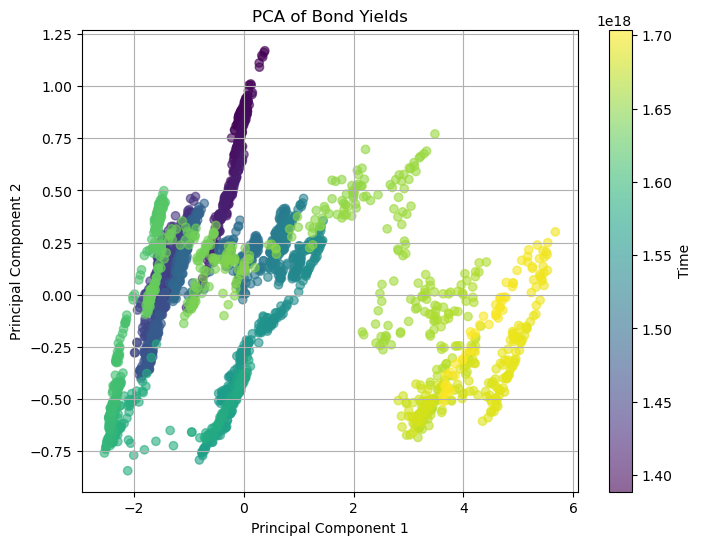

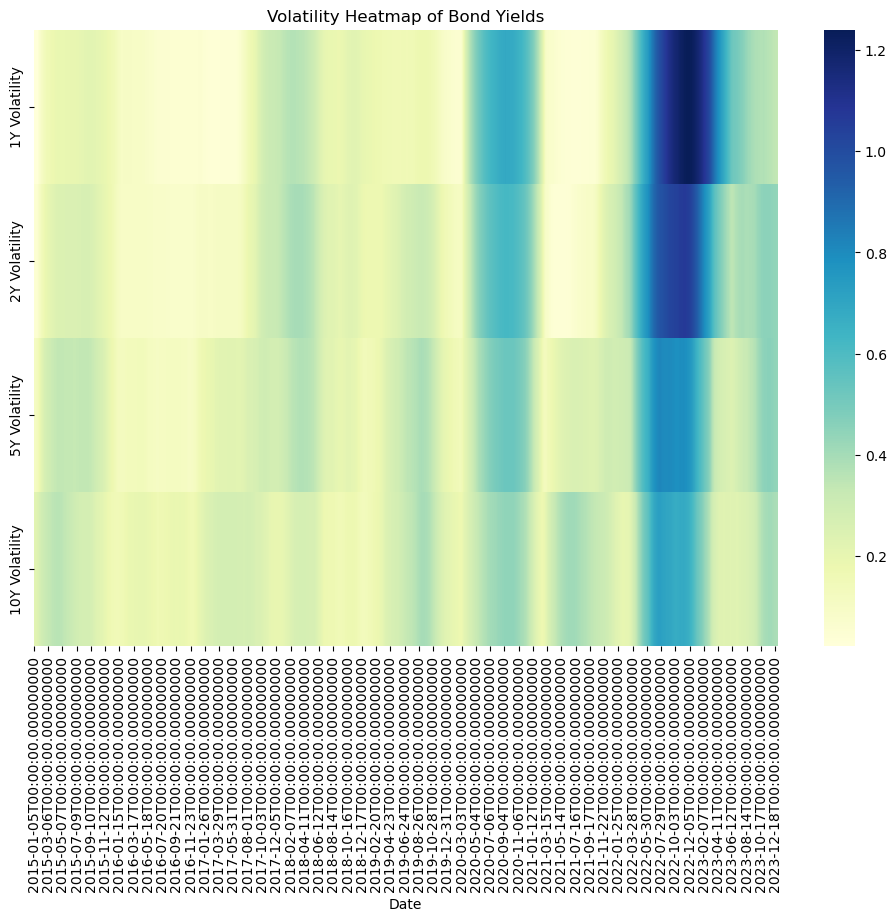

In [177]:
# 1. Rolling Volatility (Standard Deviation) for each yield
# Calculate the rolling standard deviation (volatility) for each bond yield over a 252-day window
df['1Y Volatility'] = df['1 years T-bill yields'].rolling(window=252).std()  # 1-Year T-Bill volatility
df['2Y Volatility'] = df['2 years bond yields'].rolling(window=252).std()  # 2-Year Bond volatility
df['5Y Volatility'] = df['5 years bond yields'].rolling(window=252).std()  # 5-Year Bond volatility
df['10Y Volatility'] = df['10 years bond yields'].rolling(window=252).std()  # 10-Year Bond volatility

# Plotting the rolling volatility for each bond yield
plt.figure(figsize=(14, 8))  # Set the figure size for the plot
# Plot each volatility on the same graph
sns.lineplot(data=df, x=df.index, y='1Y Volatility', label='1Y T-Bill Volatility')
sns.lineplot(data=df, x=df.index, y='2Y Volatility', label='2Y Bond Volatility')
sns.lineplot(data=df, x=df.index, y='5Y Volatility', label='5Y Bond Volatility')
sns.lineplot(data=df, x=df.index, y='10Y Volatility', label='10Y Bond Volatility')
plt.title('Rolling Volatility of Bond Yields')  # Set the title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Volatility (Standard Deviation)')  # Label for the y-axis
plt.legend()  # Show legend for different lines
plt.grid()  # Add grid for better readability
plt.show()  # Display the plot






# 2. Rolling Correlation between Yields
# Calculate the rolling correlation between different bond yields over a 252-day window
plt.figure(figsize=(14, 8))  # Set the figure size for the plot
# Calculate rolling correlations for different yield pairs
df['1Y-2Y Correlation'] = df['1 years T-bill yields'].rolling(window=252).corr(df['2 years bond yields'])
df['2Y-5Y Correlation'] = df['2 years bond yields'].rolling(window=252).corr(df['5 years bond yields'])
df['5Y-10Y Correlation'] = df['5 years bond yields'].rolling(window=252).corr(df['10 years bond yields'])

# Plotting the rolling correlations between bond yields
sns.lineplot(data=df, x=df.index, y='1Y-2Y Correlation', label='1Y-2Y Correlation')  # 1Y-2Y correlation
sns.lineplot(data=df, x=df.index, y='2Y-5Y Correlation', label='2Y-5Y Correlation')  # 2Y-5Y correlation
sns.lineplot(data=df, x=df.index, y='5Y-10Y Correlation', label='5Y-10Y Correlation')  # 5Y-10Y correlation
plt.title('Rolling Correlation Between Bond Yields')  # Set the title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Correlation')  # Label for the y-axis
plt.legend()  # Show legend for different lines
plt.grid()  # Add grid for better readability
plt.show()  # Display the plot







# 3. Principal Component Analysis (PCA)
# Performing PCA to reduce the dimensionality of bond yield data
features = ['1 years T-bill yields', '2 years bond yields', '5 years bond yields', '10 years bond yields']  # Define the features for PCA
x = df[features].values  # Extract the relevant features from the DataFrame
x = StandardScaler().fit_transform(x)  # Standardize the features to have mean=0 and variance=1

# Perform PCA to reduce to 2 principal components
pca = PCA(n_components=2)  # Initialize PCA for 2 components
principal_components = pca.fit_transform(x)  # Fit PCA and transform the data
explained_variance = pca.explained_variance_ratio_  # Get the explained variance ratios for each component

# Print the explained variance ratios
print("Explained Variance Ratios (PCA):", explained_variance)  # Display the variance explained by each principal component

# Plotting the PCA results
plt.figure(figsize=(8, 6))  # Set the figure size for the PCA plot
# Create a scatter plot of the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df.index, cmap='viridis', alpha=0.6)  
plt.title('PCA of Bond Yields')  # Set the title of the plot
plt.xlabel('Principal Component 1')  # Label for the x-axis
plt.ylabel('Principal Component 2')  # Label for the y-axis
plt.colorbar(label='Time')  # Color bar indicating the time variable
plt.grid()  # Add grid for better readability
plt.show()  # Display the plot







# 4. Volatility Heatmap
# Create a heatmap to visualize the volatility of the different bond yields
volatility_df = df[['1Y Volatility', '2Y Volatility', '5Y Volatility', '10Y Volatility']].dropna()  # Extract volatility data and drop NaN values
plt.figure(figsize=(12, 8))  # Set the figure size for the heatmap
sns.heatmap(volatility_df.T, cmap='YlGnBu', cbar=True)  # Transpose the DataFrame for heatmap visualization and apply color map
plt.title('Volatility Heatmap of Bond Yields')  # Set the title of the heatmap
plt.show()  # Display the heatmap


# Additional Analysis (Not In PowerBI & Excel)

## Autocorrelation and Partial Autocorrelation Plots

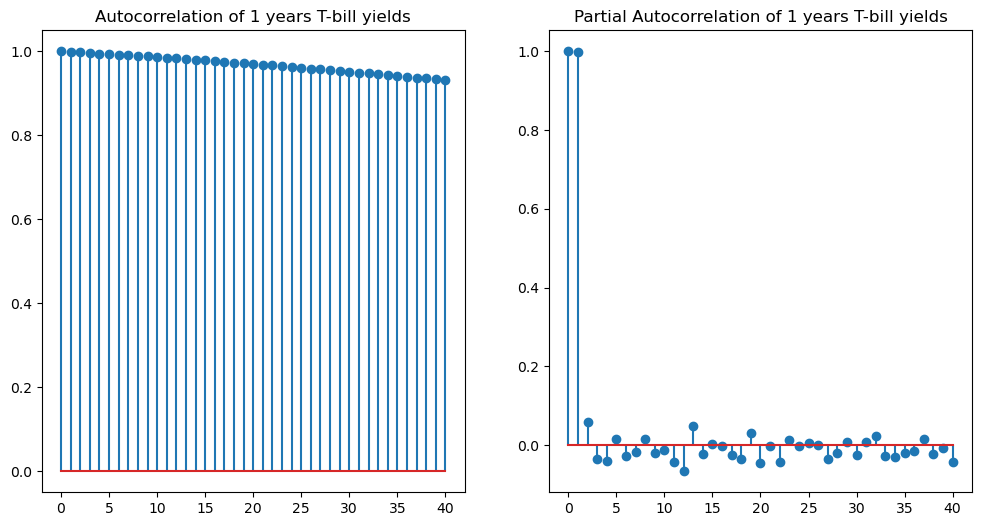

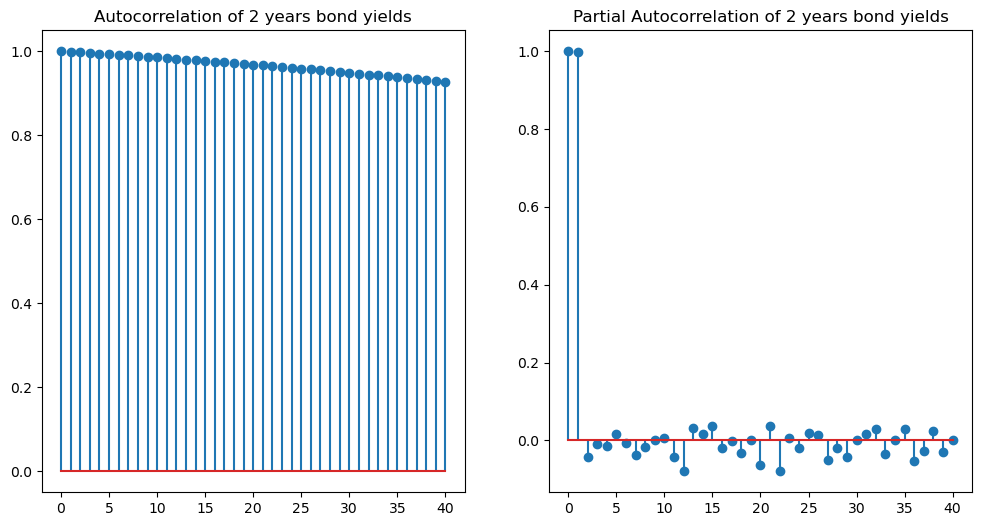

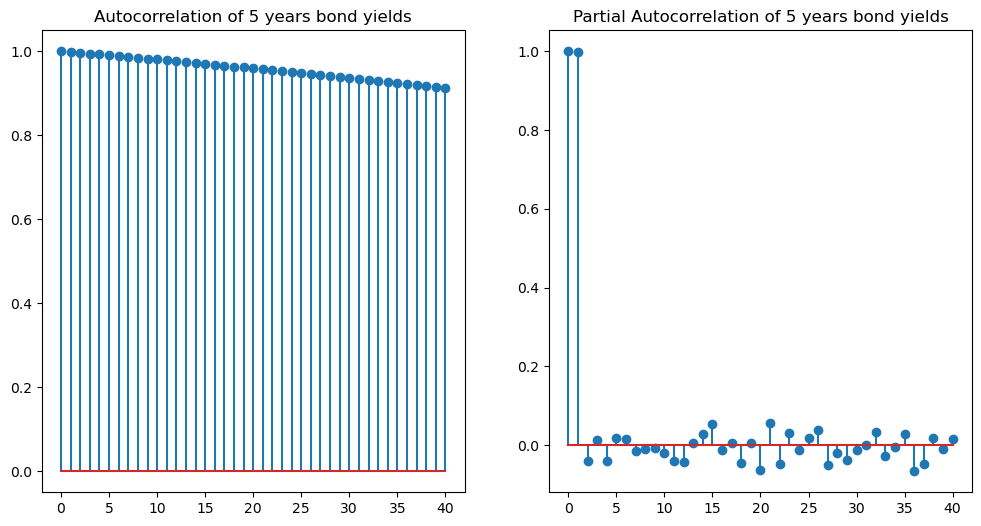

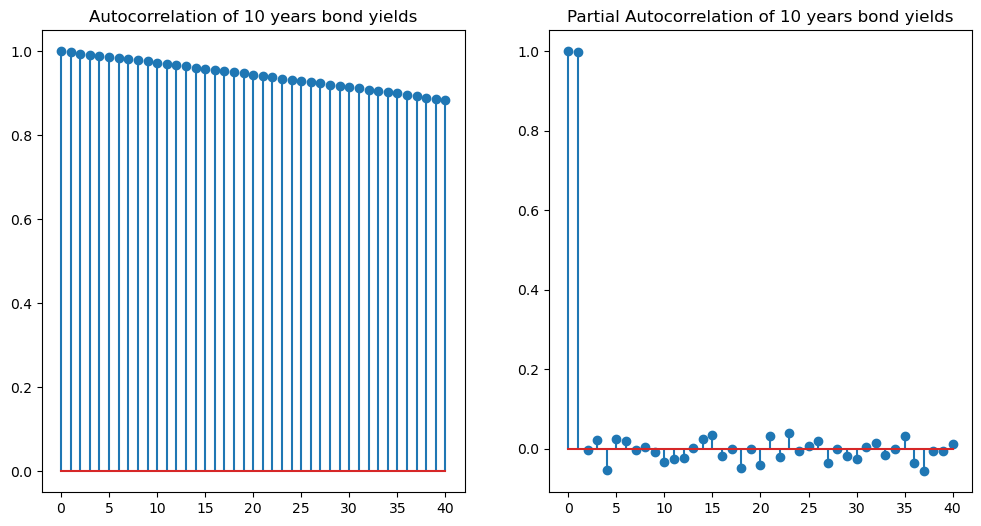

In [116]:
# Autocorrelation and Partial Autocorrelation Plots
# Loop through each yield column to generate autocorrelation and partial autocorrelation plots
for yield_column in yields:
    plt.figure(figsize=(12, 6))  # Set the figure size for the plots

    # Autocorrelation
    plt.subplot(121)  # Create a subplot for autocorrelation on the left
    plt.stem(acf(df[yield_column], nlags=40))  # Calculate and plot the autocorrelation function for the yield column
    plt.title(f'Autocorrelation of {yield_column}')  # Title for the autocorrelation plot

    # Partial Autocorrelation
    plt.subplot(122)  # Create a subplot for partial autocorrelation on the right
    plt.stem(pacf(df[yield_column], nlags=40))  # Calculate and plot the partial autocorrelation function for the yield column
    plt.title(f'Partial Autocorrelation of {yield_column}')  # Title for the partial autocorrelation plot

    plt.show()  # Display the plots for the current yield column



## Seasonal Decomposition of Time Series (For each yield)

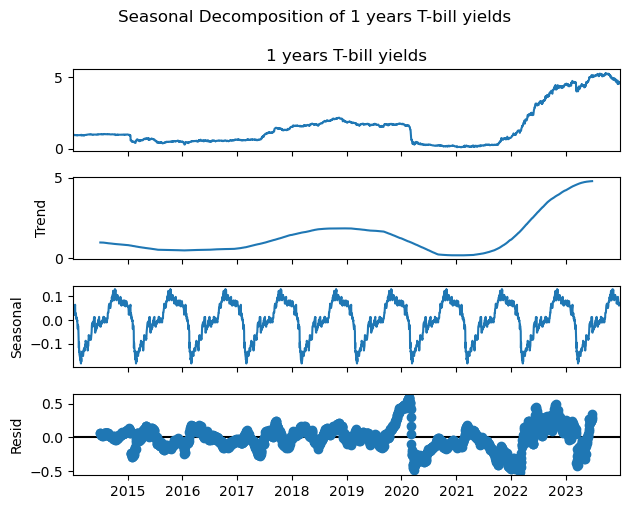

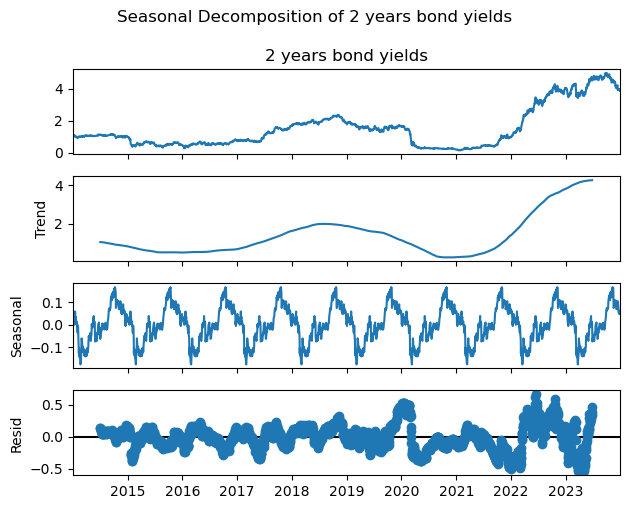

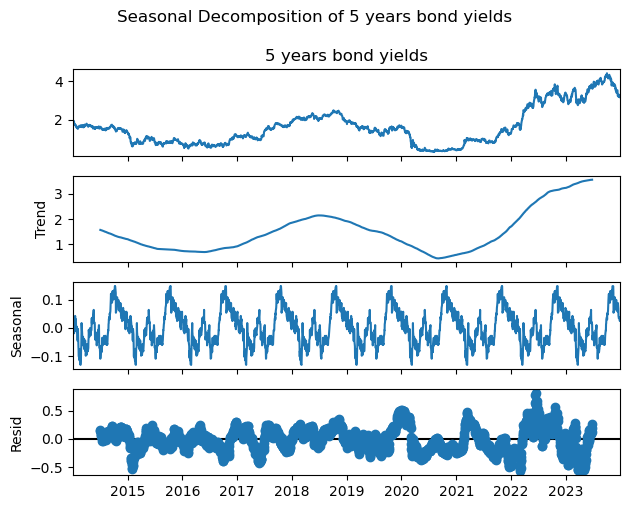

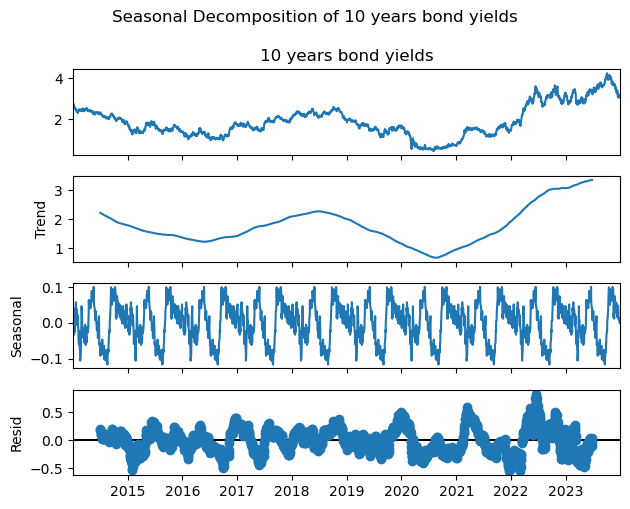

In [118]:
#Seasonal Decomposition of Time Series (For each yield)
# Define the list of yield columns to analyze
yields = ['1 years T-bill yields', '2 years bond yields', '5 years bond yields', '10 years bond yields']

# Loop through each yield column for seasonal decomposition
for yield_column in yields:
    # Perform seasonal decomposition using an additive model
    # Assuming 252 trading days per year (i.e., the frequency of the data)
    decomposition = seasonal_decompose(df[yield_column], model='additive', period=252)  
    
    # Plot the results of the decomposition
    decomposition.plot()
    
    # Set the title for the plot, adjusting the y-position for better visibility
    plt.suptitle(f'Seasonal Decomposition of {yield_column}', y=1.05)
    
    # Display the plot
    plt.show()